# IMPLEMENTATION OF NMF ALGORITHMS

The algorithms for Non negative matrix factorisation are :
  * ALternating Least Squares
  * Multiplicative Update Rule
  
We implement the two algorithms in Python.

The working is demonstrated with a simple dummy example of 5 documents of which 4 consist of Google and Page rank related info while one consists of football. The example is from the refrence [1] Example 9.3 on page 104.


Refrence:
[1] http://www.ru.ac.bd/stat/wp-content/uploads/sites/25/2019/03/106_02_Elden-Matrix-Methods-in-Data-Mining-and-Pattern-Recognition_2007.pdf

In [ ]:
import numpy as np
from scipy.optimize import nnls
import matplotlib.pyplot as plt

Testing the inhouse with a small dummy example

# Multiplicative Update

```
while (not converged)
    W=W.*(W>=0);
    H=H.*(W’*V)./((W’*W)*H+epsilon);   
    H=H.*(H>=0);    
    W=W.*(V*H’)./(W*(H*H’)+epsilon);    
    [W,H]=normalize(W,H);    
end
```

In [ ]:
# Computing the frobenius norm as the error of the matrix from decomp and the groud truth 
def error_frob_norm(X,W,H):
    return np.linalg.norm(X-np.matmul(W,H))

In [ ]:
def MU(X,k,iterations=1000,svd=False):
    
    # X is the matrix for which we want to find the decomposition
    # K is the topics we aim to decompose to

    N,D=X.shape
    loss=[]
    # random init
    if (svd==False):
        W=np.random.randint(low=1,high=5,size=(N,k))
        H=np.random.randint(low=1,high=5,size=(k,D))
    else:
        W,H=SVD_init(X,k)
        
        
    epsilon=1e-10
    for iter in range(0,iterations):
        W_grt0=W>=0
        W=W_grt0*W
        WtW=np.matmul(np.transpose(W),W)
        #print(WtW)
        H=H*(np.matmul(np.transpose(W),X))/np.matmul(WtW,H)+epsilon
        H_grt0=H>=0
        H=H_grt0*H
        HHt=np.matmul(H,np.transpose(H))
        W=W*(np.matmul(X,np.transpose(H)))/np.matmul(W,HHt)+epsilon

        loss.append(error_frob_norm(X,W,H))
        # [W,H]=normalize(W,H); How to do this ??
        W=W/W.max(0)
        H=H/H.max(0)
        
        
    
    return W,H,loss
                                           
      








# Alternating Least Squares

```
while (not converged)
[W]=normalize(W);
for i=1:n
H(:,i)=lsqnonneg(W,A(:,i));
end
for i=1:m
w=lsqnonneg(H’,A(i,:)’);
W(i,:)=w’;
end
end
```



In [ ]:
def ALS(X,k,iterations=1000,verbose=False):
    N,D=X.shape
    
    W=np.random.randint(low=1,high=5,size=(N,k))/5
    H=np.random.randint(low=1,high=5,size=(k,D))/5
    loss=[]
    

    for iter in range(0,iterations):
        if (verbose):
            print('Iter : ',iter)
        W=W/W.max(0)
        for i in range(0,D):
            #print(i)
            H[:,i],_=nnls(W, np.asarray(X[:,i]).reshape(-1).reshape(N))
        for i in range(0,N):
            w,_=nnls(np.transpose(H),np.transpose(X)[:,i].reshape(-1).reshape(D))
            W[i,:]=np.transpose(w)
        loss.append(error_frob_norm(X,W,H))

    return W,H,loss




# Demonstration

## 1] Text data analysis and topic modelling

![image.png](attachment:d5911ec1-f722-4a5c-9c03-5a78ac419ecd.png)

In [ ]:
# Dummy data 
A=np.array([[0,0,0,1,0],
            [0,0,0,0,1],
            [0,0,0,0,1],
            [1,0,1,0,0],
            [1,0,0,0,0],
            [0,1,0,0,0],
            [1,0,1,1,0],
            [0,1,1,0,0],
            [0,0,1,1,1],
            [0,1,1,0,0]])

## Implementing the MU on data

In [ ]:
W_MU,H_MU,lossMU=MU(X=A,k=3,iterations=50,svd=False)

In [ ]:
W_ALS,H_ALS,lossALS=ALS(X=A,k=3,iterations=50)

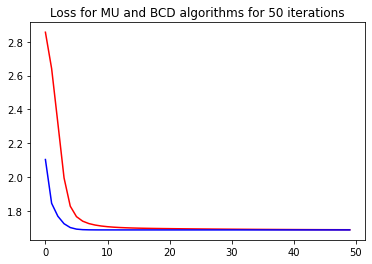

In [ ]:
plt.plot(lossMU,'r') # MU loss progress in RED
plt.plot(lossBCD,'b')# BCD loss progress in BLUE
plt.title("Loss for MU and ALS algorithms for 50 iterations")
plt.show()

## TOPIC distribution in samples

This is obtained by interpretting the H matrix

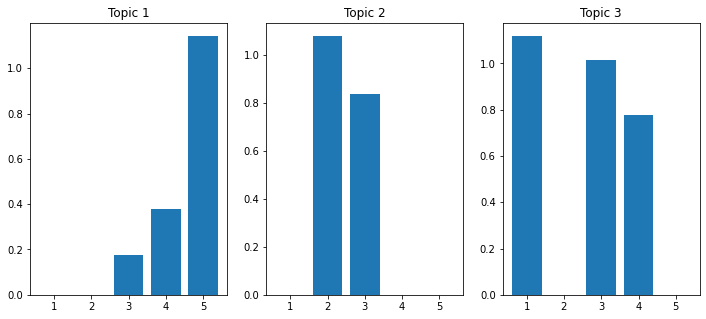

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (12, 5))
ax1.bar(x=[1,2,3,4,5],height=list(H_ALS[0,:]))
ax2.bar(x=[1,2,3,4,5],height=list(H_ALS[1,:]))
ax3.bar(x=[1,2,3,4,5],height=list(H_ALS[2,:]))
ax1.set_title("Topic 1")
ax2.set_title("Topic 2")
ax3.set_title("Topic 3")
plt.show()

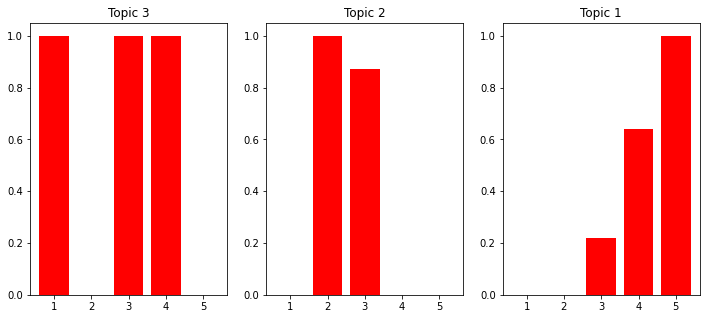

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (12, 5))
ax1.bar(x=[1,2,3,4,5],height=list(H_MU[0,:]),color='r')
ax2.bar(x=[1,2,3,4,5],height=list(H_MU[1,:]),color='r')
ax3.bar(x=[1,2,3,4,5],height=list(H_MU[2,:]),color='r')
ax1.set_title("Topic 3")
ax2.set_title("Topic 2")
ax3.set_title("Topic 1")
plt.show()

# TOPIC CHATACTERISATION USING FEATURES

This is obtained by interpretting the W matrixW_BCD[:,0]

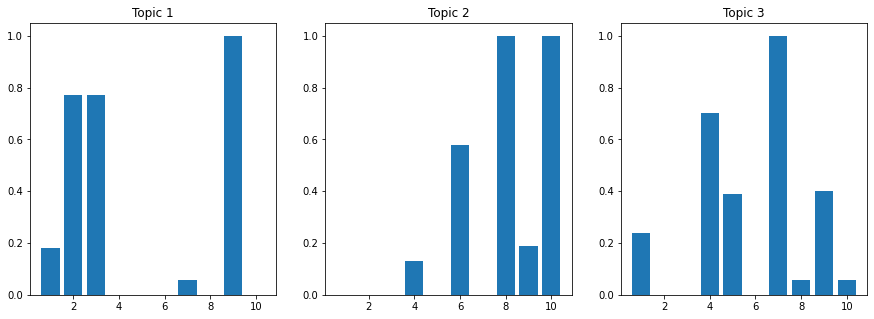

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (15, 5))
ax1.bar(x=[1,2,3,4,5,6,7,8,9,10],height=list(W_ALS[:,0]))
ax2.bar(x=[1,2,3,4,5,6,7,8,9,10],height=list(W_ALS[:,1]))
ax3.bar(x=[1,2,3,4,5,6,7,8,9,10],height=list(W_ALS[:,2]))
ax1.set_title("Topic 1")
ax2.set_title("Topic 2")
ax3.set_title("Topic 3")
plt.show()

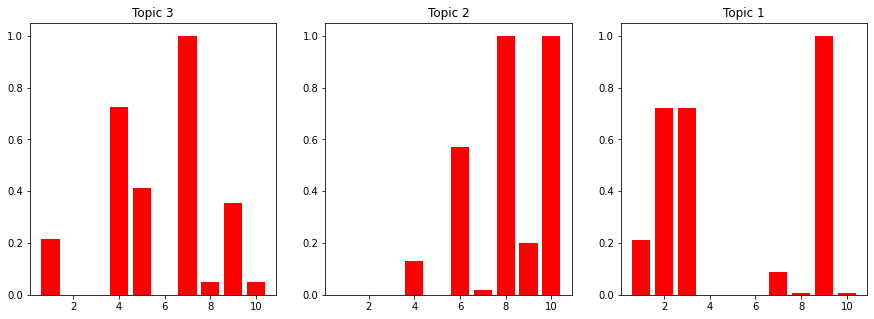

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (15, 5))
ax1.bar(x=[1,2,3,4,5,6,7,8,9,10],height=list(W_MU[:,0]),color='r')
ax2.bar(x=[1,2,3,4,5,6,7,8,9,10],height=list(W_MU[:,1]),color='r')
ax3.bar(x=[1,2,3,4,5,6,7,8,9,10],height=list(W_MU[:,2]),color='r')
ax1.set_title("Topic 3")
ax2.set_title("Topic 2")
ax3.set_title("Topic 1")
plt.show()

## 2] Image data analysis

The Lee and Seung Paper (http://www.cs.columbia.edu/~blei/fogm/2020F/readings/LeeSeung1999.pdf) used faces of 19x19 obtained from the same dataset as in the paper.

For each image, the greyscale intensities were first linearly scaled so that the pixel mean and standard deviation were equal to 0.25, and then clipped to the range [0,1] as described in the paper.
The pixel arrays are stored in a file 700scaled_faces.csv where each column is an image sample after pre-processing.


![image.png](attachment:310a9334-a415-4333-b03c-1d5a2f325ec6.png)

In [ ]:
from PIL import Image
from matplotlib import image
import math
import copy
import pandas as pd

In [ ]:
faces_data=pd.read_csv('700scaled_faces.csv')

In [ ]:
faces_data=faces_data.drop('Unnamed: 0',axis=1,)
faces_data.shape
# 19x19 images 699 such samples

(361, 699)

In [ ]:
# Helper functions for image read/write
def image_to_array(path):
    # load the image
    image = Image.open(path)
    # convert image to numpy array
    data = np.asarray(image)
    return data

def process_array(arr):
    sd=arr.std()
    b=0.25/sd
    data_mean=arr.mean()
    a=0.25-b*data_mean
    new_arr=a+b*arr
    return (new_arr>0)*(new_arr<1)*new_arr

def array_to_image(data,return_=False):
    # create Pillow image
    image2 = Image.fromarray(data)
    plt.imshow(image2)
    if return_==True:
        return image2


## Sample Image 

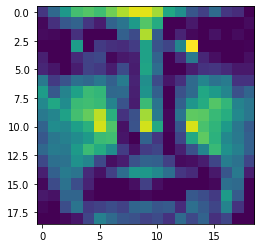

In [ ]:
arr=image_to_array('face/face00001.pgm')
array_to_image(process_array(arr))
plt.imshow(process_array(arr))

## COMPLETE DATASET

In [ ]:
A=faces_data.to_numpy()

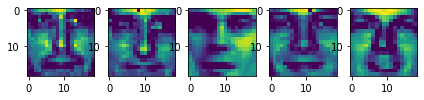

In [ ]:
fig, axs = plt.subplots(1,5,figsize=(7,7))

for i in range(5):
        axs[i].imshow(np.reshape(A[:,i*5],(19,19)),cmap='viridis')

## Running the Algorithms on the data

For illustrative purposes 1000 iterations are run. The convergence criterion that can be used are change in frobenius norm loss value in each iteration.

In [ ]:
W_MU,H_MU,loss_MU=MU(X=A,k=49,iterations=1000)

In [ ]:
W_ALS,H_ALS,loss_ALS=ALS(X=A,k=49,iterations=1000,verbose=True)

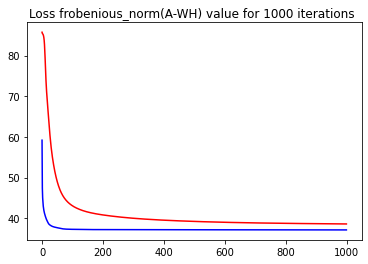

In [ ]:
plt.plot(loss_MU,'r')
plt.plot(loss_ALS,'b')
plt.title("Loss frobenious_norm(A-WH) value for 1000 iterations ")
plt.show()

## Visualising the W and H matrix

The W matrix shows the part based representations that are learnt

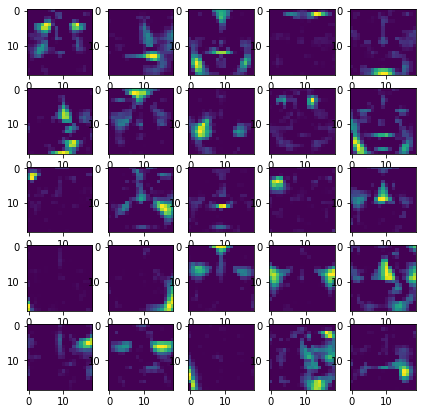

In [ ]:
fig, axs = plt.subplots(5,5,figsize=(7,7))

for i in range(5):
    for j in range(5):
        axs[i,j].imshow(np.reshape(W_MU[:,i*5+j],(19,19)),cmap='viridis')

H would then denote the activations

### Original Image vs Approximated by using the decomposition

In [ ]:
# retrieve the face from the computed W and H
A_MU_approx=np.matmul(W_MU,H_MU)

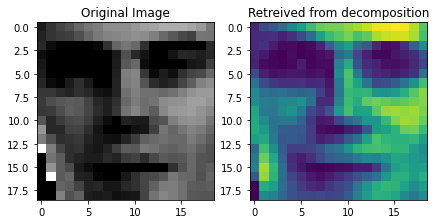

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(7,7))
ax1.imshow(process_array(image_to_array('face/face00009.pgm')),cmap='gray')
ax1.set_title("Original Image")
ax2.imshow(np.reshape(A_MU_approx[:,9],(19,19)))
ax2.set_title("Retreived from decomposition")
plt.show()

# 3] Real World Text Data

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

In [ ]:
df=pd.read_csv('35_stories.csv')

In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df.shape

(35, 4)

## Data Preview

In [ ]:
df.head(10)

,Plot,Plot_lemmatize,Plot_lemmatize_clean,Title
0,oliver puddin head johnson lou costello and ro...,oliver puddin head johnson lou costello and ro...,oliver puddin head johnson lou costello and ro...,Abbott and Costello Meet Captain Kidd
1,shelley allen natasha richardson operates a ha...,shelley allen natasha richardson operate a hai...,shelley allen natasha richardson operate a hai...,Blow Dry
2,a young girl who is unable to sleep asks her f...,a young girl who be unable to sleep ask her fa...,a young girl who be unable to sleep ask her fa...,Eega
3,cass silver robert ryan marshal of a small kan...,cass silver robert ryan marshal of a small kan...,cass silver robert ryan marshal of a small kan...,The Proud Ones
4,the film deals with three ladies – parvathi a ...,the film deal with three lady – parvathi a p...,the film deal with three lady – parvathi a p...,Pennkulathin Ponvilakku
5,john bennett has been divorced from lori colli...,john bennett have be divorce from lori collin ...,john bennett have be divorce from lori collin ...,Ted 2
6,prior to a new hotel opening on amity island a...,prior to a new hotel open on amity island a gr...,prior to a new hotel open on amity island a gr...,Jaws 2
7,shaquille oneal and dr phil wake up to find th...,shaquille oneal and dr phil wake up to find th...,shaquille oneal and dr phil wake up to find th...,Scary Movie 4
8,in the small town of concord massachusetts dur...,in the small town of concord massachusett duri...,in the small town of concord massachusett duri...,Little Women
9,it has been years since oscar madison and fel...,it have be year since oscar madison and feli...,it have be year since oscar madison and feli...,The Odd Couple II


In [ ]:
names_data=pd.read_csv('first_names.all.csv')

In [ ]:
names_data.columns

Index(['Name', 'perc'], dtype='object')

In [ ]:
names_lower=[]
for name in names_data['Name']:
    names_lower.append(name.lower())

In [ ]:
# words to drop while vectorising since no added benefit to the plot
stop_words=list(ENGLISH_STOP_WORDS)+names_lower

plots=df['Plot'].to_list()
titles=df['Title'].to_list()

# tf-idf for vectorising the data
vectoriser=TfidfVectorizer(stop_words=stop_words)
vectors=vectoriser.fit_transform(plots).todense()


In [ ]:
# obtaining the vocabulary used for matrix formulation from plot data
vocab=np.array(vectoriser.get_feature_names())

### Vocabulary consists of 2539 words

In [ ]:
vocab.shape

(2539,)

In [ ]:
# each data point is now a vector
vectors.shape

(35, 2539)

In [ ]:
X_data=vectors.transpose().A

In [ ]:
W_data,H_data,Loss_Data=MU(X_data,k=5,iterations=25000)

In [ ]:
def get_top_words(topic, k=10):
    return [vocab[i] for i in np.argsort(topic)[:-k-1:-1]]

def get_topics(matrix, k=10):
    topic_words = ([get_top_words(t, k) for t in matrix])
    return [' '.join(t) for t in topic_words]
  
# get the k most important words for each topic
get_topics(H_data)

['accounts acquaintance able academy accompanies adams accuses abandoned acts accepts',
 'adamant actual actor accepting accompany accept acquires abductor abilities acquainted',
 'absence accomplish actor addict actually accounts abductor accept accepts activist',
 'abductor academic activist act acquittal accepted adams acquainted actual accepting',
 'addict acquainted accused actually abilities ability accident accepts acting accidentally']

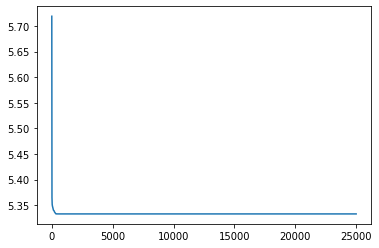

In [ ]:
plt.plot(Loss_Data)

Here the topics we obtained are not yet well developed all seem to be from the alphabet a from the vocab. More extensive training and some additionally regularisation and code optimisation is used for the NMF library implementation which allows better results.